#The experimental XPCS data are fitted with ISF 

In [1]:
import skxray.core.roi as roi
import skxray.core.correlation as corr
import skxray.core.utils as core

from lmfit import minimize, Parameters

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


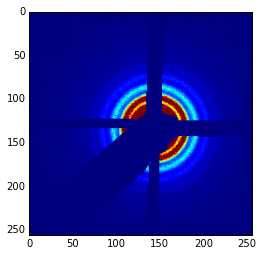

In [2]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

avg_img = np.average(duke_data, axis=0)

mask4 = np.load("/Users/sameera/Desktop/XSVS/new_mask4.npy")
mask = np.load("/Users/sameera/Desktop/XSVS/Luxi_data/Luxi_duke_mask.npy")

N_mask = ~(mask + mask4)

plt.imshow(N_mask*avg_img, vmax=1e0)
plt.show()

#  Make the rings and find the experimental auto correlation values

In [179]:
inner_radius = 24
width = 1
spacing = 0
num_rings = 5
center = (133, 143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, avg_img.shape)

mask_data2 = N_mask*duke_data[0:4999]

ring_mask = rings*N_mask

num_levels = 7
num_bufs = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, ring_mask,
                                             mask_data2)

exposuretime=0.001;
deadtime=60e-6;
timeperframe = exposuretime+deadtime
lags = lag_steps*timeperframe

roi_names = ['gray', 'orange', 'brown', 'red', 'green', 'blue', 'black',
             'purple', 'pink', 'yellow']

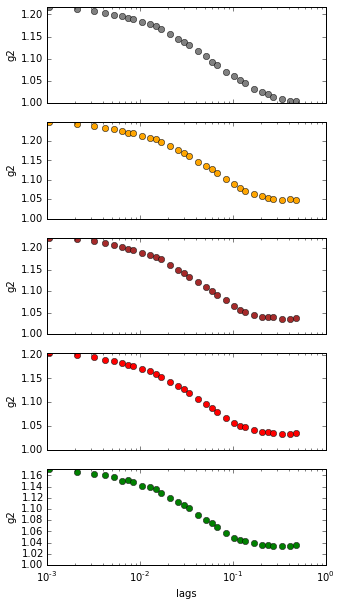

In [180]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("lags")
for i, roi_color in zip(range(num_rings), roi_names):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], 'o', markerfacecolor=roi_color, markersize=6)
    axes[i].set_ylim(bottom=1, top=np.max(g2[1:, i]))
plt.show()

## Convert the ring values to q

In [181]:
dpix =0.055

lambda_ = 1.5498  # wavelength
Ldet = 2200.   #   # distance to sample

edges

array([[ 24.,  25.],
       [ 25.,  26.],
       [ 26.,  27.],
       [ 27.,  28.],
       [ 28.,  29.]])

In [182]:
two_theta = core.radius_to_twotheta(Ldet, edges*dpix)
q_val = core.twotheta_to_q(two_theta, lambda_)

q_val

array([[ 0.00243251,  0.00253387],
       [ 0.00253387,  0.00263522],
       [ 0.00263522,  0.00273658],
       [ 0.00273658,  0.00283793],
       [ 0.00283793,  0.00293929]])

In [183]:
q_ring = np.mean(q_val, axis=1)

# Do the fitting

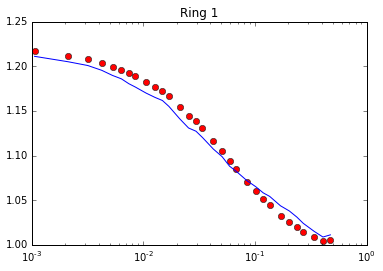

In [184]:
# create a set of Parameters for first ring
params1 = Parameters()
params1.add('beta',  value=0.2345, min=0.189, max=0.325)
params1.add('relaxation_rate', value=6.78, min=6.57, max=6.897)
params1.add('baseline', value=1, min=0.93, max=1.5)

final_result1 = corr.fit_auto_corr(params1, lags, g2[:, 0], eps_data=1)

plt.semilogx(lags, g2[:,0], 'ro')
plt.semilogx(lags, final_result1, '-b')
plt.ylim(1.0, 1.25)
plt.title("Ring 1")
plt.show()

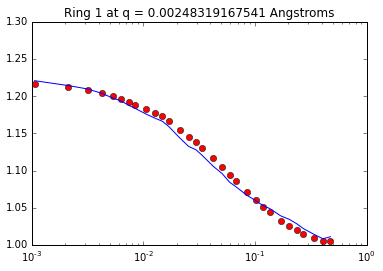

In [194]:
params1 = Parameters()
params1.add('beta',  value=0.1699, min=0.167, max=0.21556)
params1.add('relaxation_rate', value=6.159, min=6.158, max=6.197)
params1.add('baseline', value=1, min=0.8, max=1.0)

final_result1 = corr.fit_auto_corr(params1, lags, g2[:, 0], eps_data=1)

plt.semilogx(lags, g2[:,0], 'ro')
plt.semilogx(lags, final_result1, '-b')
plt.ylim(1.0, 1.3)
plt.title("Ring 1 at q = "+str(q_ring[0])+" Angstroms")
plt.show()

In [187]:
params1.values()


[<Parameter 'beta', value=0.21555996185081069 +/- 0, bounds=[0.167:0.21556]>,
 <Parameter 'relaxation_rate', value=6.1969998793173549 +/- 0, bounds=[6.158:6.197]>,
 <Parameter 'baseline', value=1.0 +/- 0, bounds=[0.8:1.0]>]

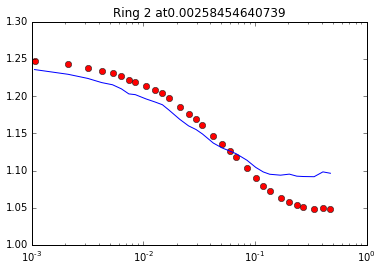

In [192]:
params2 = Parameters()
params2.add('beta',  value=0.1699, min=0.0899, max=0.456)
params2.add('relaxation_rate', value=6.345, min=6.158, max=6.367)
params2.add('baseline', value=1, min=0.8, max=1.0)

final_result2 = corr.fit_auto_corr(params2, lags, g2[:, 1], eps_data=1)

plt.semilogx(lags, g2[:,1], 'ro')
plt.semilogx(lags, final_result2, '-b')
plt.ylim(1.0, 1.3)
plt.title("Ring 2 at q = "+ str(q_ring[1])+" Angstroms")
plt.show()

In [340]:
params2.values()

[<Parameter 'beta', value=0.26326557696733155 +/- 0, bounds=[0.0899:0.456]>,
 <Parameter 'relaxation_rate', value=6.1580000115641944 +/- 0, bounds=[6.158:6.367]>,
 <Parameter 'baseline', value=1.0 +/- 0, bounds=[0.8:1.0]>]

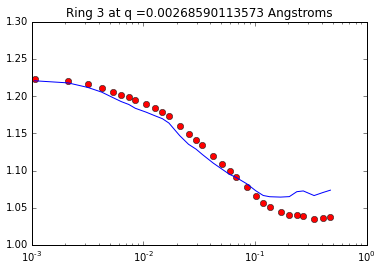

In [268]:
params3 = Parameters()
params3.add('beta',  value=0.1699, min=0.1567, max=0.2297)
params3.add('relaxation_rate', value=6.59, min=6.567, max=6.678)
params3.add('baseline', value=1, min=0.8, max=1.5)

final_result3 = corr.fit_auto_corr(params3, lags, g2[:, 2], eps_data=1)

plt.semilogx(lags, g2[:, 2], 'ro')
plt.semilogx(lags, final_result3, '-b')
plt.ylim(1.0, 1.3)
plt.title("Ring 3 at q ="+str(q_ring[2])+" Angstroms")
plt.show()

In [264]:
params3.values()

[<Parameter 'beta', value=0.22969999940964014 +/- 0, bounds=[0.1567:0.2297]>,
 <Parameter 'relaxation_rate', value=6.6870200721798332 +/- 0, bounds=[6.124:7.896]>,
 <Parameter 'baseline', value=1.0 +/- 0, bounds=[0.8:1.5]>]

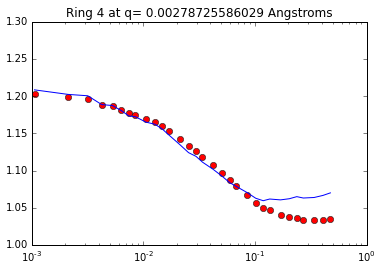

In [290]:
params4 = Parameters()
params4.add('beta',  value=0.1699, min=0.1234, max=0.1998)
params4.add('relaxation_rate', value=6.78, min=6.756, max=6.789)
params4.add('baseline', value=1, min=0.8, max=1.5)

final_result4 = corr.fit_auto_corr(params4, lags, g2[:, 3], eps_data=1)

plt.semilogx(lags, g2[:, 3], 'ro')
plt.semilogx(lags, final_result4, '-b')
plt.ylim(1.0, 1.3)
plt.title("Ring 4 at q= "+str(q_ring[3])+" Angstroms")
plt.show()

In [291]:
params4.values()

[<Parameter 'beta', value=0.19979992675477559 +/- 0, bounds=[0.1234:0.1998]>,
 <Parameter 'relaxation_rate', value=6.7560000722172679 +/- 0, bounds=[6.756:6.789]>,
 <Parameter 'baseline', value=1.0 +/- 0, bounds=[0.8:1.5]>]

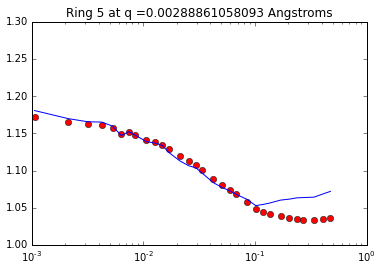

In [338]:
params5 = Parameters()
params5.add('beta',  value=0.1234, min=0.10456, max=0.1656)
params5.add('relaxation_rate', value=6.867, min=6.5678, max=6.89)
params5.add('baseline', value=1, min=0.9, max=1.0)

final_result5 = corr.fit_auto_corr(params5, lags, g2[:, 4], eps_data=1)

plt.semilogx(lags, g2[:, 4], 'ro')
plt.semilogx(lags, final_result5, '-b')
plt.ylim(1.0, 1.3)
plt.title("Ring 5 at q ="+str(q_ring[4])+" Angstroms")
plt.show()

In [339]:
params5.values()

[<Parameter 'beta', value=0.16559999991631752 +/- 0, bounds=[0.10456:0.1656]>,
 <Parameter 'relaxation_rate', value=6.5678002190687321 +/- 0, bounds=[6.5678:6.89]>,
 <Parameter 'baseline', value=1.0 +/- 0, bounds=[0.9:1.0]>]

In [314]:
params5.values()[1]

<Parameter 'relaxation_rate', value=6.8571075101047265 +/- 0, bounds=[6.78:7.678]>

In [368]:
def diffusive_coefficient(relaxation_rates, q_values):
    """
    For Brownian samples, the diffusive coefficient can be obtained
    Parameters
    ---------
    relaxation_rates : array
        relaxation rates of the sample Brownian motion
    q_values : array
        scattering vectors for each relaxation rates
        (same shape as relaxation_rates)
    Returns
    -------
    diff_co : float
        diffusive coefficient for Brownian samples
    Note
    ----
    These implementations are based on the references under
    negative_binom_distribution() function Note
    """
    return relaxation_rates/(q_values**2)


def diff_co_residuals(params, diff_co, q_values):
    """
    Parameters
    ----------
    params : dict or Parameters
        relax_rate - float, relaxation time associated with the
        samples dynamics,
    diff_co : array
        diffusive coefficients
    q_values:
    Return
    ------
    """
    # create set of parameters
    relax_rate = params['relaxation_rate'].value

    return (diff_co - diffusive_coefficient(relax_rate, q_values))


def minimize_diff_co(params, q_values,  diff_co):

    result = minimize(diff_co_residuals, params, args=(1/q_values**2,
                                                           diff_co))
    return diff_co + result.residual


In [369]:
relax_rates = np.array([6.1969998793173549, 6.1580000115641944, 6.6870200721798332, 6.7560000722172679, 6.5678002190687321 ])

In [370]:
relax_rates

array([ 6.19699988,  6.15800001,  6.68702007,  6.75600007,  6.56780022])

In [371]:
dif_co= diffusive_coefficient(relax_rates, q_ring)

In [372]:
dif_co

array([ 1004988.28751334,   921872.83153703,   926942.04373882,
         869632.91882084,   787121.79577322])

In [373]:
diffusive_coefficient = np.mean(dif_co)

(5, 10)

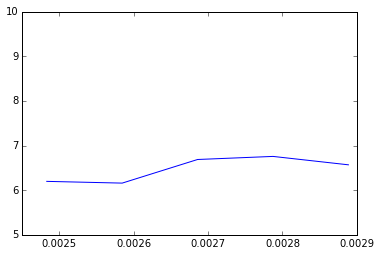

In [374]:
plt.plot(q_ring, relax_rates)
plt.ylim(5,10)

In [375]:
# Diffusive coefficent for 